In [67]:
import pandas as pd
import matplotlib.pyplot as plt

crime_data = pd.read_csv('../Data/crime_data_updated.csv')

# Part 1) Temporal Patterns

In [ ]:
# Convert the 'Date' column to datetime format
crime_data['Date'] = pd.to_datetime(crime_data['Date'], errors='coerce')
# Create a new column 'Year' by extracting the year from the Date column
crime_data['Year'] = crime_data['Date'].dt.year

# Count crimes per year using groupby and size
crimes_per_year = crime_data.groupby('Year').size()
print(crimes_per_year)

Year
2003    142803
2004    142054
2005    137048
2006    131856
2007    131771
2008    135242
2009    134309
2010    127758
2011    126713
2012    135464
2013    147664
2014    144844
2015    151459
2016    145994
2017    149487
2018    143663
2019    138380
2020    112167
2021    121722
2022    127404
2023    125024
2024    102225
2025      7208
dtype: int64


In [69]:
# Get the year with the most crimes
year_most_crimes = crimes_per_year.idxmax()
max_crimes = crimes_per_year.max()

# Get the year with the fewest crimes
year_fewest_crimes = crimes_per_year.idxmin()
min_crimes = crimes_per_year.min()

print("Year with most recorded crimes:", year_most_crimes, "with", max_crimes, "crimes")
print("Year with fewest recorded crimes:", year_fewest_crimes, "with", min_crimes, "crimes")

Year with most recorded crimes: 2015 with 151459 crimes
Year with fewest recorded crimes: 2025 with 7208 crimes


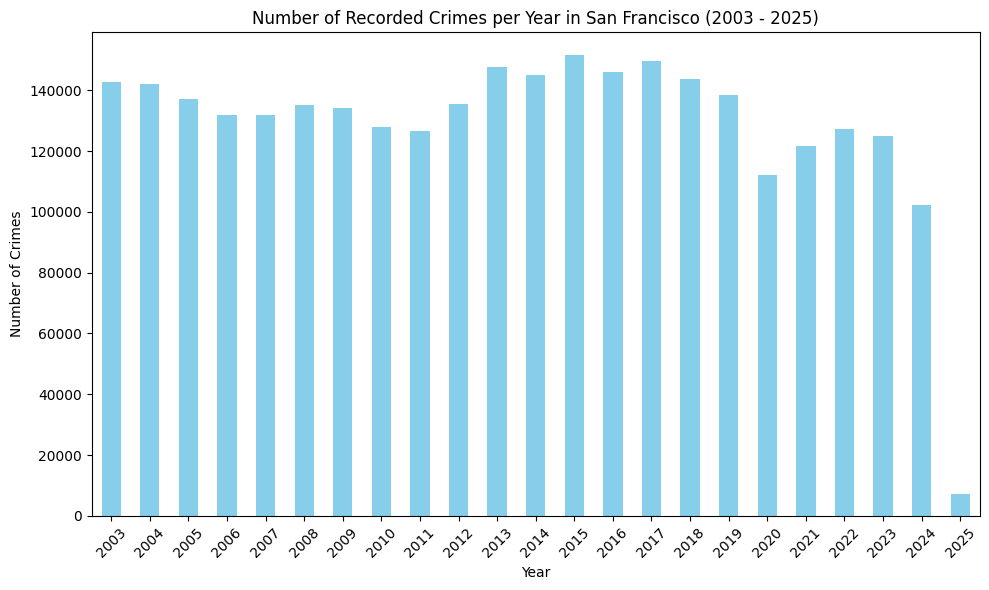

In [70]:
# Sort the crimes per year from lowest to highest
crimes_per_year_sorted = crimes_per_year.sort_index()

# Plot bar plot of crimes per year
plt.figure(figsize=(10, 6))
crimes_per_year_sorted.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Recorded Crimes per Year in San Francisco (2003 - 2025)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

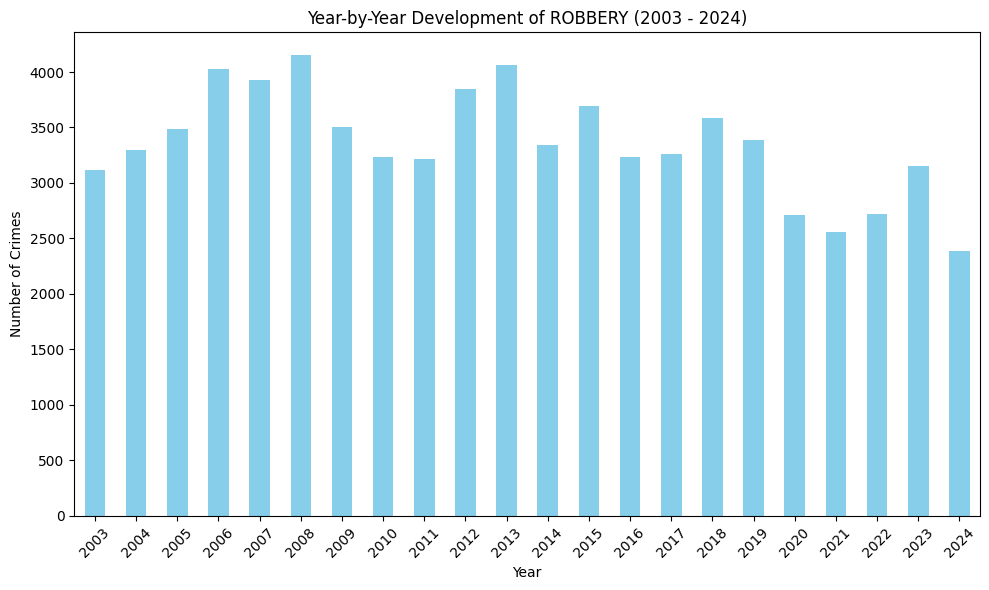

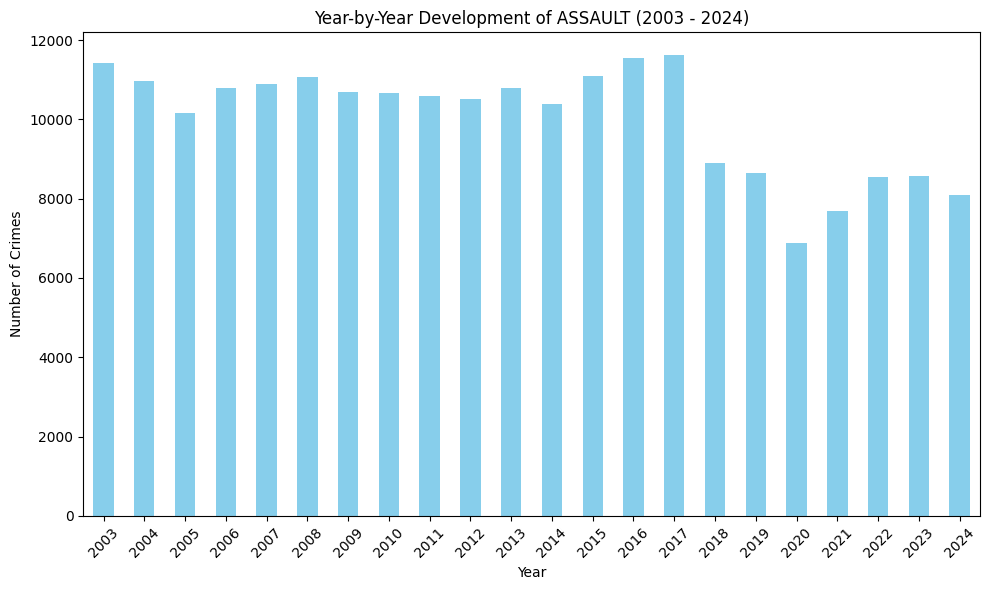

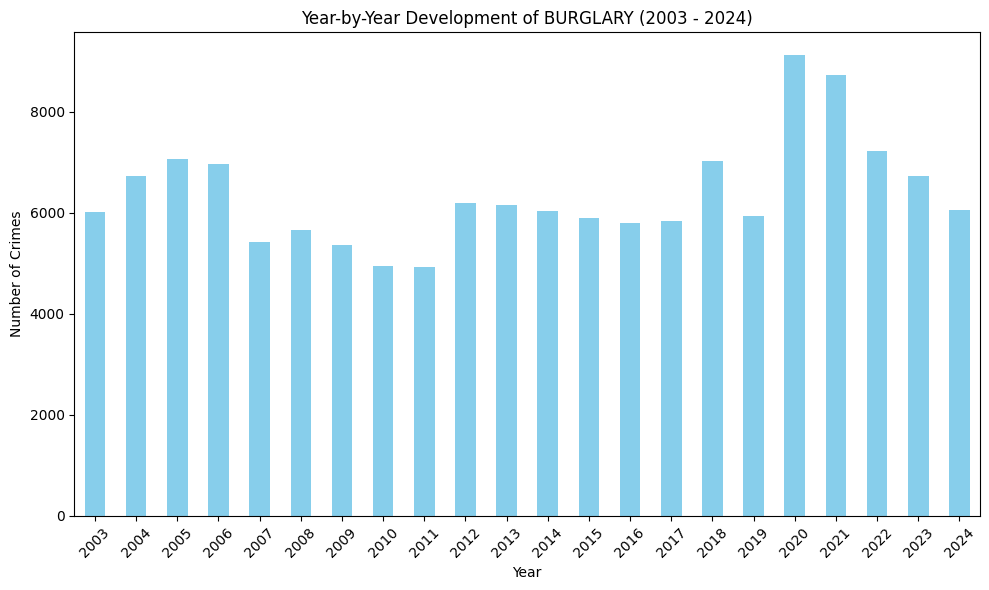

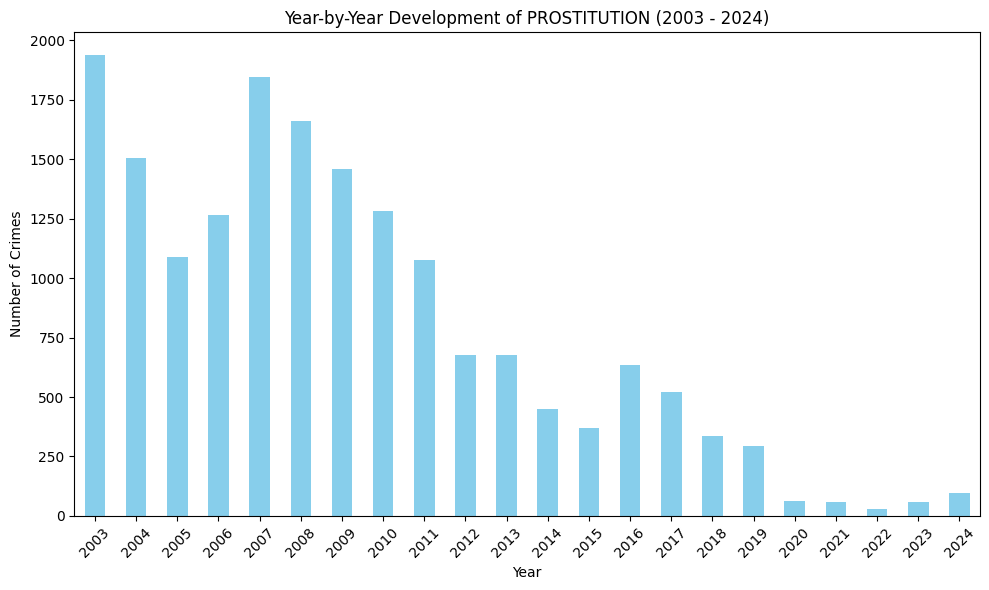

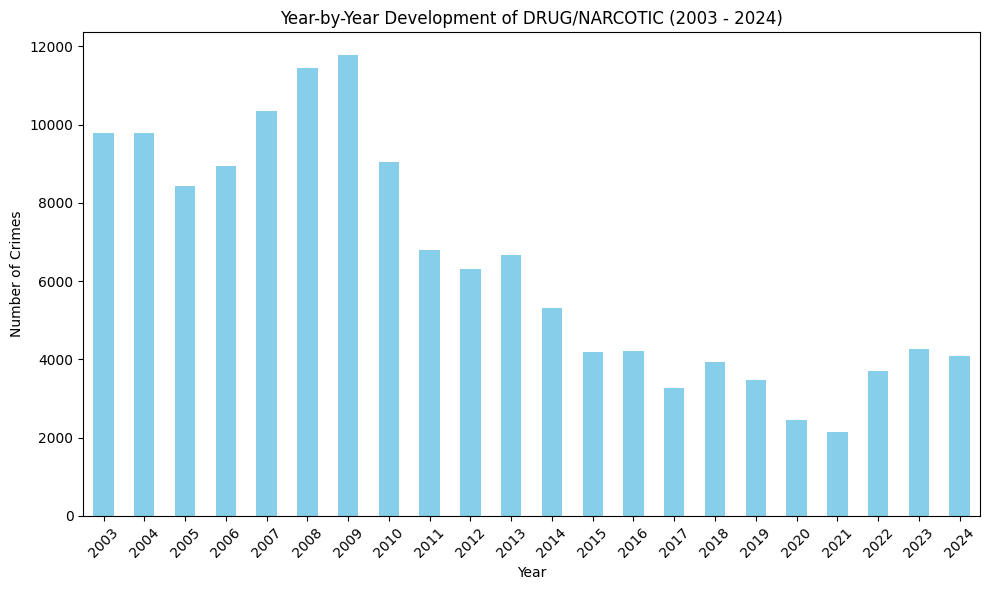

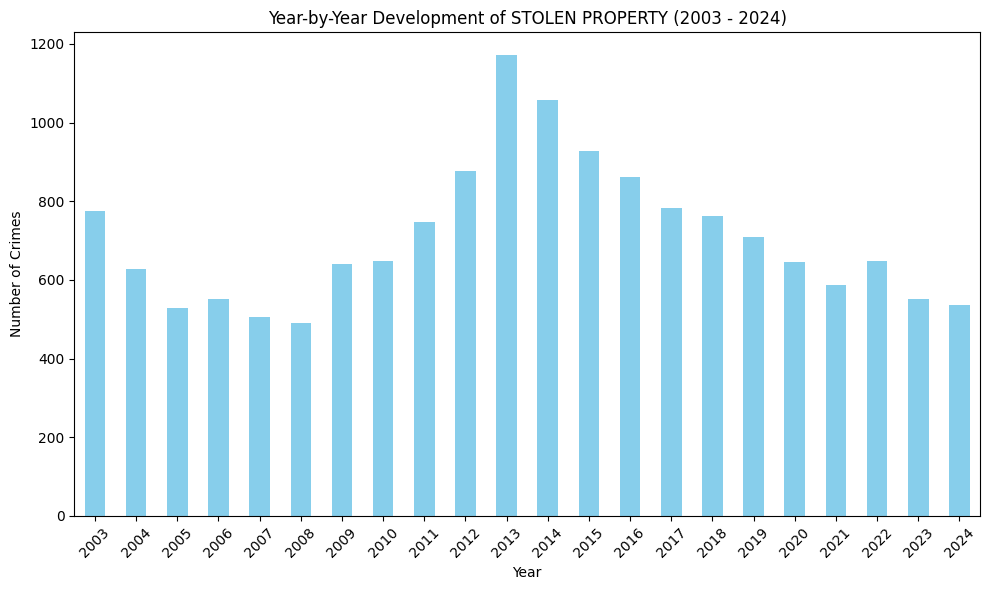

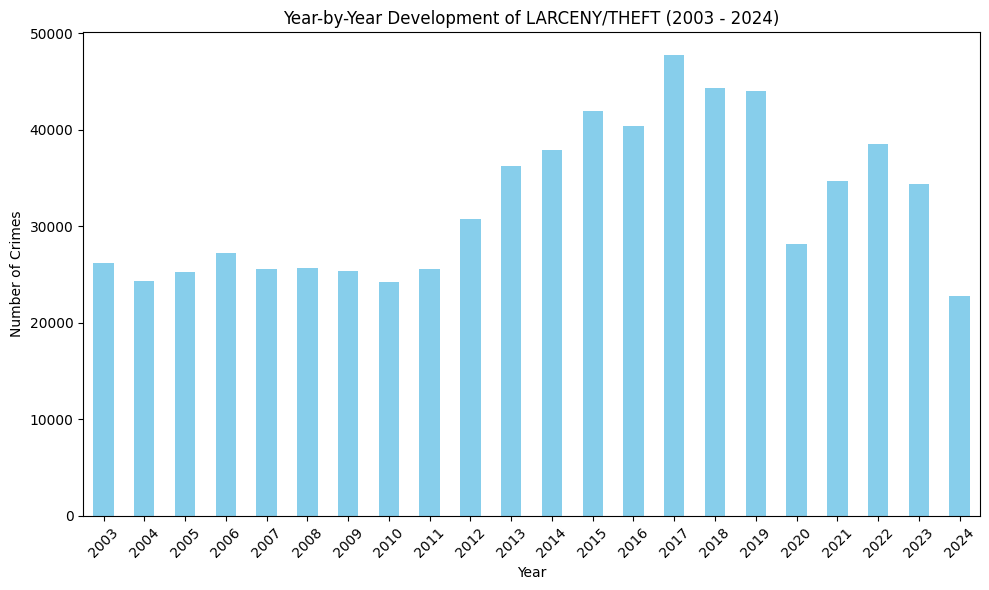

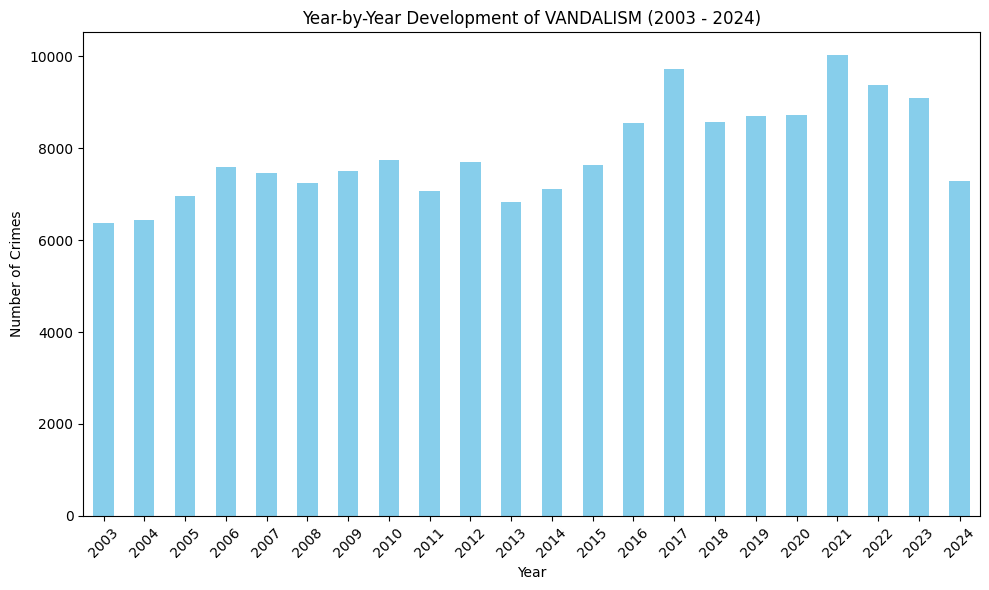

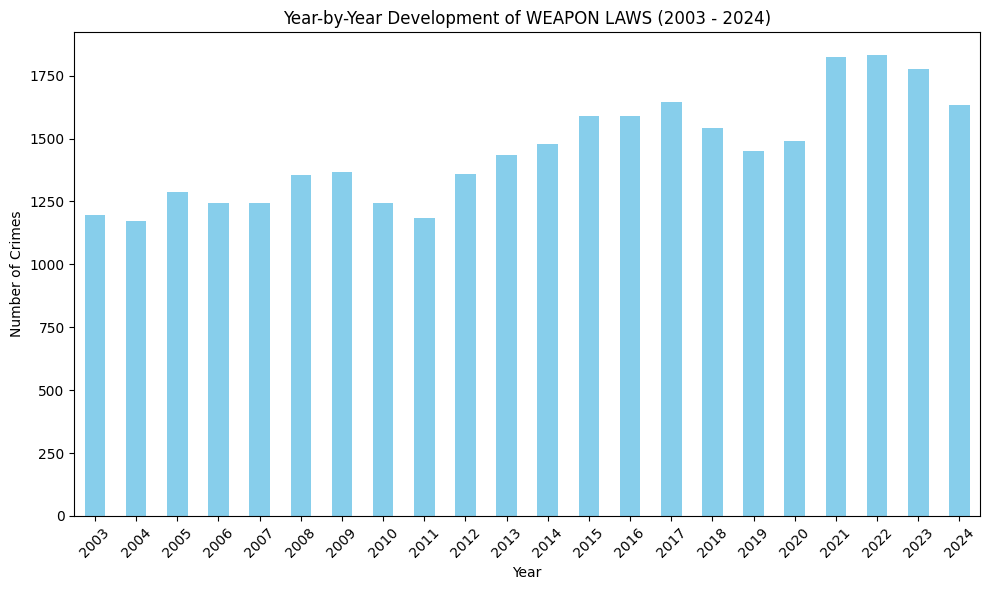

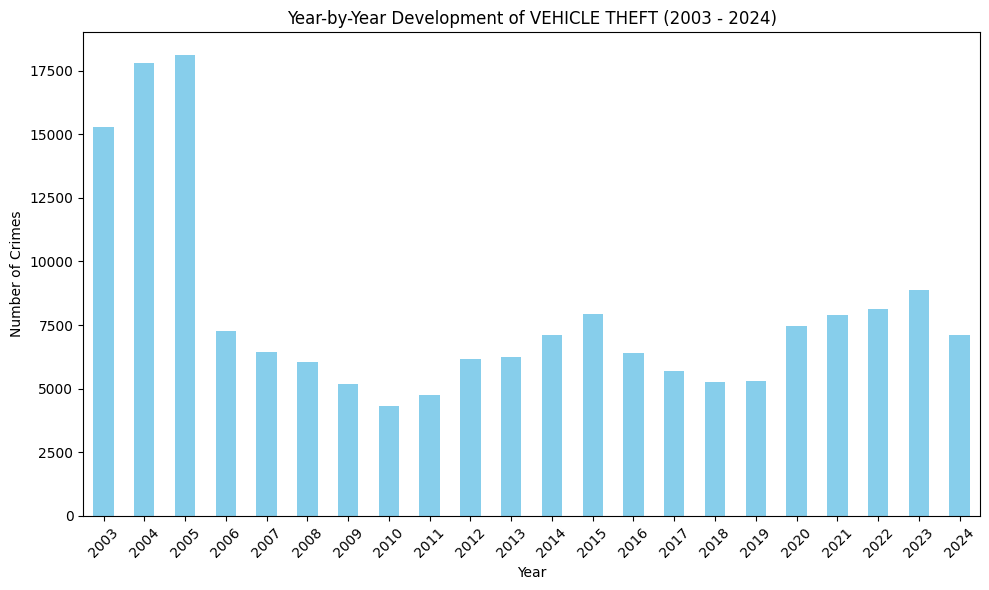

In [72]:
# Now to plot the focus crimes bar plots

# Define the focus crime categories
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

# Since 2025 isn't over yet, we exclude it from the data
crime_data = crime_data[(crime_data['Year'] >= 2003) & (crime_data['Year'] <= 2024)]

# Loop over each focus crime category
for crime in focuscrimes:
    # Filter for the current crime category
    crime_subset = crime_data[crime_data['Category'] == crime]
    
    # Count the number of crimes per year
    crimes_per_year = crime_subset['Year'].value_counts().sort_index()
    
    # To ensure that every year is represented even though the count is 0, we add missing years with 0 crimes just in case
    all_years = pd.Series(0, index=range(2003, 2025))
    crimes_per_year = all_years.add(crimes_per_year, fill_value=0).astype(int)
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    crimes_per_year.plot(kind='bar', color='skyblue')
    plt.xlabel('Year')
    plt.ylabel('Number of Crimes')
    plt.title(f'Year-by-Year Development of {crime} (2003 - 2024)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Part 1) Continued: 

## Comment on at least three interesting trends in your plot.

1. One interesting trend is that prostitution has declined heavily since 2007, which coincided with the subprime mortgage crisis of 2007. One explanation could be that due to the economic circumstances, sex services became less affordable and thus it declined. In the 2010s it continued to decline, despite the latter half of the 2010s marking an economic recovery [1].

2. Also noticed, when cleaning the dataset, the new dataset had vandalism, but the numbers were significantly smaller than the old dataset from 2003 to 2018. When I combined malicious mischief, which hints at vandalism, the numbers matched the previous dataset more, so a reclassification of vandalism was interesting.

3. Another issue of narcotics has also gone significantly down in the 2010s, which is partly attributed to Proposition 47, which was designed to ease up on the prison population and thus reclassified various crimes from felonies to misdemeanors, including possession of most illegal narcotics for consumption [3].

### References:
[1] Doe, J. (2010). *Economic Effects of the 2007 Financial Crisis*. Journal of Economics.  
[2] California Legislative Information. *Proposition 47 Overview*. Available at: [https://www.courts.ca.gov/prop47.htm](https://www.courts.ca.gov/prop47.htm)
